In [1]:
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')

#settings
pd.options.display.max_columns = 250
pd.options.display.max_rows = 250
sns.set(style="whitegrid")

import warnings
warnings.simplefilter('ignore')

In [2]:
df = pd.read_pickle("Brain_data.pkl")

print("Rows: ", df.shape[0])
print("Columns: ", df.shape[1])

Rows:  114
Columns:  4913


In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,...,4788,4789,4790,4791,4792,4793,4794,4795,4796,4797,4798,4799,4800,4801,4802,4803,4804,4805,4806,4807,4808,4809,4810,4811,4812,4813,4814,4815,4816,4817,4818,4819,4820,4821,4822,4823,4824,4825,4826,4827,4828,4829,4830,4831,4832,4833,4834,4835,4836,4837,4838,4839,4840,4841,4842,4843,4844,4845,4846,4847,4848,4849,4850,4851,4852,4853,4854,4855,4856,4857,4858,4859,4860,4861,4862,4863,4864,4865,4866,4867,4868,4869,4870,4871,4872,4873,4874,4875,4876,4877,4878,4879,4880,4881,4882,4883,4884,4885,4886,4887,4888,4889,4890,4891,4892,4893,4894,4895,4896,4897,4898,4899,4900,URSI,CCI,Sex,Age,Subject_type,FSIQ,CAQ,Neuroticm,Extraversion,Openness,Agreeableness,Conscientiousness
0,0.0,5619.0,1778.0,18057.0,22818.0,13.0,6869.0,2458.0,1334.0,4795.0,15577.0,271.0,5889.0,4.0,1712.0,1937.0,7205.0,3449.0,3674.0,54.0,3720.0,22.0,4474.0,15042.0,21144.0,8867.0,4380.0,3156.0,7089.0,6062.0,9631.0,6210.0,0.0,140.0,5906.0,22850.0,444.0,1973.0,5165.0,20844.0,0.0,922.0,0.0,0.0,0.0,3777.0,0.0,1176.0,0.0,989.0,0.0,1074.0,4871.0,1656.0,0.0,298.0,0.0,188.0,11549.0,13219.0,1348.0,2178.0,407.0,11380.0,0.0,502.0,112.0,0.0,0.0,16.0,0.0,0.0,0.0,646.0,480.0,37.0,330.0,1905.0,4239.0,8754.0,985.0,845.0,0.0,320.0,0.0,6197.0,299.0,1056.0,0.0,0.0,0.0,12.0,614.0,672.0,2106.0,1401.0,0.0,0.0,389.0,947.0,13660.0,5093.0,0.0,0.0,5418.0,304.0,8.0,0.0,0.0,419.0,0.0,0.0,0.0,0.0,0.0,172.0,0.0,0.0,0.0,0.0,0.0,18.0,278.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,M87102217,M87102217,111.08,0,20,1,123,42.0,20,34,43,30,30
1,0.0,3804.0,1705.0,9629.0,16300.0,0.0,4953.0,1292.0,1317.0,3640.0,3070.0,149.0,2616.0,41.0,358.0,1881.0,8373.0,7689.0,3079.0,0.0,2153.0,521.0,4433.0,8071.0,24494.0,15085.0,3080.0,2375.0,7427.0,12269.0,6107.0,6013.0,0.0,70.0,2705.0,16280.0,397.0,1781.0,1440.0,11450.0,0.0,201.0,97.0,0.0,8.0,3977.0,0.0,882.0,0.0,960.0,0.0,1035.0,5293.0,212.0,0.0,56.0,0.0,2728.0,5658.0,6423.0,668.0,2229.0,1104.0,2504.0,908.0,0.0,381.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,173.0,0.0,0.0,2155.0,4671.0,7117.0,453.0,567.0,0.0,171.0,0.0,5095.0,79.0,497.0,0.0,0.0,0.0,535.0,34.0,0.0,537.0,1230.0,0.0,0.0,0.0,1110.0,10505.0,5779.0,0.0,0.0,4561.0,45.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,M87102806,M87102806,83.49,0,20,0,108,3.0,11,21,34,17,32
2,0.0,6218.0,2732.0,29416.0,18178.0,0.0,6332.0,4957.0,2955.0,4736.0,9109.0,1040.0,6232.0,845.0,987.0,2385.0,8893.0,10656.0,6354.0,95.0,1797.0,0.0,3226.0,12892.0,29323.0,15180.0,5546.0,2749.0,23912.0,11680.0,11535.0,6483.0,38.0,98.0,4294.0,21876.0,811.0,2142.0,2021.0,17038.0,0.0,1073.0,0.0,264.0,0.0,8353.0,0.0,1196.0,0.0,1208.0,0.0,1988.0,9172.0,589.0,0.0,120.0,0.0,7.0,7992.0,8843.0,1690.0,2629.0,1386.0,6067.0,1547.0,0.0,1940.0,0.0,0.0,0.0,0.0,0.0,0.0,845.0,557.0,0.0,0.0,3510.0,6395.0,7517.0,126

19    25
21    16
20    11
18    11
22    10
23     9
26     7
25     7
24     7
27     5
28     4
29     2
Name: Age, dtype: int64


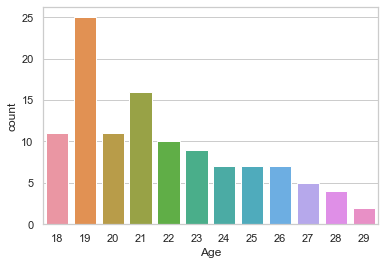

In [4]:
print(df.Age.value_counts())
ax = sns.countplot(df.Age,label="Count")

1    64
0    50
Name: Sex, dtype: int64


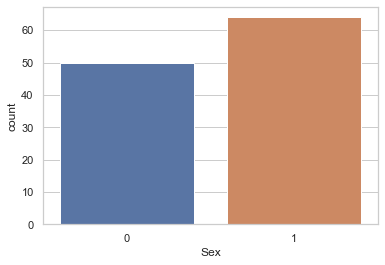

In [5]:
print(df.Sex.value_counts())
ax = sns.countplot(df.Sex,label="Count")

In [6]:
new_df = pd.DataFrame(columns=['ColumnName', 'Null_Count_%', 'Distinct_Values', 'Min', 'Mean', 'Max', 'dtype'])
i = 0
#print(df.shape[0])
for item in df.columns:
    if(df[item].dtype == 'object'):
        new_df.loc[i] = [item, df[item].isnull().sum()/df.shape[0] * 100, df[item].nunique(), "Na", "Na", "Na", df[item].dtype]
    else:
        new_df.loc[i] = [item, df[item].isnull().sum()/df.shape[0] * 100, df[item].nunique(), df[item].min(), df[item].mean(), df[item].max(), df[item].dtype]
    
    i=i+1
print("Column Information: ")
new_df

Column Information: 


,ColumnName,Null_Count_%,Distinct_Values,Min,Mean,Max,dtype
0,0,0.000000,1,0,0,0,float64
1,1,0.000000,114,392,4644.75,11297,float64
2,2,0.000000,113,122,2299.08,6216,float64
3,3,0.000000,114,8459,19913.6,34711,float64
4,4,0.000000,112,6279,15513.6,31591,float64
5,5,0.000000,17,0,5.28947,121,float64
6,6,0.000000,111,932,5875.78,10933,float64
7,7,0.000000,113,682,3165.96,9499,float64
8,8,0.000000,110,59,1959.01,6635,float64
9,9,0.000000,113,399,3810.25,9515,float64


In [7]:
# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.90
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]

In [8]:
len(to_drop)

687

In [9]:
# Drop features 
df = df.drop(df[to_drop], axis=1)

In [10]:
df.shape

(114, 4226)

In [11]:
feature_name = df.columns.tolist()
drop_columns = feature_name[-13:]

In [12]:
y = df.Sex
X = df.drop(labels=drop_columns, axis = 1)
feature_name = X.columns.tolist()

# Pearson Correlation

In [13]:
def cor_selector(X, y):
    cor_list = []
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-250:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature

In [14]:
cor_support, cor_feature = cor_selector(X, y)
print(str(len(cor_feature)), 'selected features')

250 selected features


# Chi-2

In [15]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
X_norm = MinMaxScaler().fit_transform(X)
chi_selector = SelectKBest(chi2, k=250)
chi_selector.fit(X_norm, y)

SelectKBest(k=250, score_func=<function chi2 at 0x00000227909509D8>)

In [16]:
chi_support = chi_selector.get_support()
chi_feature = X.loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')

250 selected features


# Recursive Feature Elimination

In [17]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=250, step=20, verbose=5)
rfe_selector.fit(X_norm, y)

Fitting estimator with 4213 features.
Fitting estimator with 4193 features.
Fitting estimator with 4173 features.
Fitting estimator with 4153 features.
Fitting estimator with 4133 features.
Fitting estimator with 4113 features.
Fitting estimator with 4093 features.
Fitting estimator with 4073 features.
Fitting estimator with 4053 features.
Fitting estimator with 4033 features.
Fitting estimator with 4013 features.
Fitting estimator with 3993 features.
Fitting estimator with 3973 features.
Fitting estimator with 3953 features.
Fitting estimator with 3933 features.
Fitting estimator with 3913 features.
Fitting estimator with 3893 features.
Fitting estimator with 3873 features.
Fitting estimator with 3853 features.
Fitting estimator with 3833 features.
Fitting estimator with 3813 features.
Fitting estimator with 3793 features.
Fitting estimator with 3773 features.
Fitting estimator with 3753 features.
Fitting estimator with 3733 features.
Fitting estimator with 3713 features.
Fitting esti

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=100,
                                 multi_class='warn', n_jobs=None, penalty='l2',
                                 random_state=None, solver='warn', tol=0.0001,
                                 verbose=0, warm_start=False),
    n_features_to_select=250, step=20, verbose=5)

In [18]:
rfe_support = rfe_selector.get_support()
rfe_feature = X.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')

250 selected features


# Logistic Regression (Select from model)

In [53]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

embeded_lr_selector = SelectFromModel(LogisticRegression(penalty="l1"), threshold='0.00000001*median')
embeded_lr_selector.fit(X_norm, y)

SelectFromModel(estimator=LogisticRegression(C=1.0, class_weight=None,
                                             dual=False, fit_intercept=True,
                                             intercept_scaling=1, l1_ratio=None,
                                             max_iter=100, multi_class='warn',
                                             n_jobs=None, penalty='l1',
                                             random_state=None, solver='warn',
                                             tol=0.0001, verbose=0,
                                             warm_start=False),
                max_features=None, norm_order=1, prefit=False,
                threshold='0.00000001*median')

In [54]:
embeded_lr_support = embeded_lr_selector.get_support()
embeded_lr_feature = X.loc[:,embeded_lr_support].columns.tolist()
print(str(len(embeded_lr_feature)), 'selected features')

4213 selected features


# Random forest (Select from model)

In [55]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100), threshold=0.0014)
embeded_rf_selector.fit(X, y)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100, n_jobs=None,
                                                 oob_score=False,
                                                 random_state=None, verbose=0,
  

In [56]:
embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')

245 selected features


# LightGBM

In [57]:
from sklearn.feature_selection import SelectFromModel
from lightgbm import LGBMClassifier

lgbc=LGBMClassifier(n_estimators=500, learning_rate=0.05, num_leaves=32, colsample_bytree=0.2,
            reg_alpha=3, reg_lambda=1, min_split_gain=0.01, min_child_weight=40)

embeded_lgb_selector = SelectFromModel(lgbc, max_features=250)
embeded_lgb_selector.fit(X, y)

SelectFromModel(estimator=LGBMClassifier(boosting_type='gbdt',
                                         class_weight=None,
                                         colsample_bytree=0.2,
                                         importance_type='split',
                                         learning_rate=0.05, max_depth=-1,
                                         min_child_samples=20,
                                         min_child_weight=40,
                                         min_split_gain=0.01, n_estimators=500,
                                         n_jobs=-1, num_leaves=32,
                                         objective=None, random_state=None,
                                         reg_alpha=3, reg_lambda=1, silent=True,
                                         subsample=1.0,
                                         subsample_for_bin=200000,
                                         subsample_freq=0),
                max_features=250, norm_order=1, prefit=False,

In [58]:
embeded_lgb_support = embeded_lgb_selector.get_support()
embeded_lgb_feature = X.loc[:,embeded_lgb_support].columns.tolist()
print(str(len(embeded_lgb_feature)), 'selected features')

250 selected features


# Conclusion

In [59]:
pd.set_option('display.max_rows', None)
# put all selection together
feature_selection_df = pd.DataFrame({'Feature':feature_name, 'Pearson':cor_support, 'Chi-2':chi_support, 'RFE':rfe_support, 
                                    'RandomForest':embeded_rf_support, 'LightGBM':embeded_lgb_support})
# count the selected times for each feature
feature_selection_df['Total'] = np.sum(feature_selection_df[['Pearson', 'Chi-2', 'RFE', 'RandomForest', 'LightGBM']], axis=1)
# display the top 100
feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)
feature_selection_df.head(250)

,Feature,Pearson,Chi-2,RFE,RandomForest,LightGBM,Total
1,26,True,True,True,True,True,5
2,20,True,True,True,True,True,5
3,18,True,True,True,True,True,5
4,14,True,True,True,True,True,5
5,12,True,True,True,True,True,5
6,4263,True,True,True,True,False,4
7,4199,True,True,True,True,False,4
8,4192,True,True,True,True,False,4
9,4120,True,True,True,True,False,4
10,4052,True,True,True,True,False,4


In [73]:
selected_feature = feature_selection_df.loc[feature_selection_df['Total'] > 2]['Feature']

In [74]:
df_selected = df[selected_feature].copy()
df_selected.head()

,26,20,18,14,12,4263,4199,4192,4120,4052,3843,3842,3835,3489,3344,3145,3128,2986,2843,2790,2719,2717,2510,2497,1811,1743,1672,1663,1504,860,712,442,371,292,271,237,236,224,222,175,163,162,160,61,2,4190,3977,3915,3909,3772,3769,3767,3697,3565,3416,3348,3276,3207,3137,2999,2997,2939,2723,2722,2720,2714,2701,2519,2512,2506,2504,2499,2307,2211,1952,1948,1928,1859,1855,1785,1781,1776,1706,1671,1657,1638,1516,1428,1427,1285,1253,1228,1227,1168,1048,1019,879,866,854,791,725,713,640,553,538,523,506,438,363,361,360,340,300,295,272,270,268,267,248,245,239,238,235,234,228,214,198,197,167,166,157,154,152,144,143,91,37,34,30,28,17,15,13,3,1
0,4380.0,3720.0,3674.0,1712.0,5889.0,785.0,433.0,105.0,5054.0,0.0,0.0,1025.0,991.0,0.0,1937.0,7545.0,256.0,6005.0,123.0,4013.0,11517.0,356.0,13373.0,6326.0,19.0,8048.0,7.0,1056.0,0.0,3033.0,56.0,0.0,1846.0,1212.0,1336.0,7388.0,1206.0,0.0,706.0,5990.0,1297.0,0.0,2760.0,2178.0,1778.0,7236.0,19.0,0.0,27.0,8518.0,3582.0,44.0,5428.0,5409.0,2210.0,0.0,5752.0,518.0,53.0,173.0,62.0,0.0,21442.0,6386.0,150.0,0.0,112.0,3618.0,5115.0,77.0,244.0,3240.0,515.0,0.0,1917.0,15.0,4915.0,3033.0,4285.0,1637.0,5957.0,42.0,0.0,0.0,0.0,12578.0,4.0,3961.0,9367.0,0.0,1948.0,4.0,4.0,0.0,0.0,311.0,1295.0,4123.0,5223.0,4580.0,9863.0,402.0,580.0,37.0,0.0,45.0,2930.0,0.0,66.0,1036.0,80.0,1722.0,3259.0,43.0,1320.0,218.0,10636.0,154.0,10152.0,11962.0,1344.0,22052.0,1412.0,16102.0,7769.0,19141.0,154.0,0.0,6739.0,1484.0,0.0,0.0,211.0,10918.0,6851.0,12.0,1973.0,5906.0,9631.0,7089.0,3449.0,1937.0,4.0,18057.0,5619.0
1,3080.0,2153.0,3079.0,358.0,2616.0,2127.0,4.0,243.0,5171.0,0.0,245.0,1984.0,527.0,0.0,1646.0,5456.0,657.0,7469.0,479.0,2984.0,12044.0,1777.0,15696.0,2690.0,30.0,3704.0,31.0,35.0,0.0,2080.0,3.0,83.0,1136.0,117.0,25.0,6579.0,108.0,0.0,0.0,2893.0,1048.0,0.0,1662.0,2229.0,1705.0,9966.0,8.0,1.0,181.0,3089.0,4459.0,839.0,6953.0,3802.0,2946.0,28.0,6569.0,1873.0,81.0,0.0,68.0,0.0,16045.0,6776.0,1274.0,0.0,323.0,1004.0,2841.0,39.0,1.0,975.0,133.0,0.0,862.0,0.0,831.0,977.0,2124.0,805.0,3542.0,37.0,0.0,14.0,6.0,9829.0,0.0,3363.0,6350.0,242.0,2719.0,0.0,0.0,131.0,0.0,43.0,139.0,2804.0,2141.0,3106.0,4419.0,450.0,267.0,0.0,0.0,2.0,4226.0,251.0,145.0,1332.0,0.0,498.0,1461.0,12.0,1407.0,0.0,4032.0,0.0,3146.0,5047.0,1686.0,20407.0,1947.0,9516.0,7778.0,8406.0,1305.0,0.0,2866.0,390.0,1.0,0.0,17.0,7668.0,5688.0,535.0,1781.0,2705.0,6107.0,7427.0,7689.0,1881.0,41.0,9629.0,3804.0
2,5546.0,1797.0,6354.0,987.0,6232.0,1531.0,76.0,2658.0,1229.0,183.0,144.0,1268.0,716.0,310.0,3143.0,6608.0,358.0,8672.0,0.0,5388.0,16113.0,1556.0,17360.0,8406.0,45.0,3579.0,0.0,0.0,0.0,2988.0,112.0,0.0,2647.0,1189.0,1.0,11733.0,1937.0,0.0,1939.0,7999.0,1911.0,0.0,1644.0,2629.0,2732.0,12414.0,0.0,0.0,811.0,7253.0,3323.0,843.0,2887.0,5145.0,3379.0,41.0,8359.0,6.0,0.0,0.0,0.0,0.0,16959.0,12752.0,5977.0,185.0,2004.0,2053.0,9796.0,49.0,681.0,3160.0,18.0,2.0,2558.0,17.0,3131.0,1625.0,3638.0,886.0,6067.0,45.0,0.0,0.0,0.0,15510.0,4.0,3311.0,5433.0,0.0,3188.0,0.0,0.0,3.0,0.0,251.0,1181.0,7939.0,4560.0,6657.0,11797.0,451.0,724.0,0.0,0.0,135.0,3087.0,0.0,11.0,2441.0,19.0,1617.0,1567.0,175.0,2986.0,0.0,4508.0,0.0,3606.0,8672.0,6747.0,35072.0,7208.0,21943.0,11941.0,10099.0,1789.0,0.0,6180.0,937.0,27.0,0.0,618.0,12061.0,6157.0,0.0,2142.0,4294.0,11535.0,23912.0,10656.0,2385.0,845.0,29416.0,6218.0
3,2006.0,752.0,4465.0,811.0,3725.0,1308.0,5.0,0.0,2542.0,0.0,13.0,1853.0,568.0,0.0,1670.0,5533.0,857.0,4789.0,0.0,2404.0,12614.0,641.0,7575.0,2883.0,0.0,259.0,0.0,0.0,0.0,3022.0,50.0,0.0,542.0,516.0,1.0,3684.0,499.0,420.0,1353.0,4442.0,2020.0,0.0,680.0,519.0,1655.0,6370.0,0.0,0.0,18.0,1434.0,1515.0,537.0,2106.0,4752.0,3726.0,0.0,6002.0,4.0,0.0,1.0,0.0,0.0,14276.0,4852.0,3059.0,0.0,1573.0,2059.0,1816.0,86.0,0.0,790.0,30.0,2.0,956.0,0.0,1000.0,522.0,1022.0,849.0,3659.0,0.0,0.0,0.0,0.0,8200.0,1.0,2368.0,6364.0,0.0,44.0,6.0,0.0,46.0,10.0,7.0,358.0,2558.0,3916.0,3239.0,9135.0,406.0,889.0,0.0,31.0,26.0,2816.0,385.0,42.0,254.0,0.0,1550.0,401.0,481.0,846.0,1025.0,5966.0,0.0,5824.0,7995.0,1748.0,16124.0,47

In [76]:
# add the target variable in our data so that we apply machine learning algorithms to our data set.
df_selected['Sex'] = df['Sex']
df_selected.shape

(114, 146)

In [78]:
df_selected.to_pickle('Brain_SelectedData.pkl')